# instacart-market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = '~/Desktop/etc/Kaggle/instacart-market-basket-analysis/'
aisles = pd.read_csv(base_path + 'aisles.csv')
departments = pd.read_csv(base_path + 'departments.csv')
prior = pd.read_csv(base_path + 'order_products__prior.csv')
train = pd.read_csv(base_path + 'order_products__train.csv')
orders = pd.read_csv(base_path + 'orders.csv')
products = pd.read_csv(base_path + 'products.csv')

In [3]:
print(aisles.shape,departments.shape,prior.shape,train.shape,orders.shape,products.shape)

(134, 2) (21, 2) (32434489, 4) (1384617, 4) (3421083, 7) (49688, 4)


In [66]:
# prior의 sample 추출 (row 일부 추출)
prior_sample = prior[:40000]

In [67]:
# 테이블 병합
temp = pd.merge(orders, prior_sample, on='order_id')
temp = pd.merge(temp, products, on='product_id')
temp = pd.merge(temp, aisles, on='aisle_id')
temp = pd.merge(temp, departments, on='department_id')
temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1483,90,prior,31,3,13,5.0,32818,1,1,Organic Pink Lemonade Bunny Fruit Snacks,50,19,fruit vegetable snacks,snacks
1,4205,61197,prior,8,6,16,7.0,32818,12,1,Organic Pink Lemonade Bunny Fruit Snacks,50,19,fruit vegetable snacks,snacks
2,2127,2985,prior,11,3,2,17.0,32773,1,0,VEGET TOMATO BASIL,50,19,fruit vegetable snacks,snacks
3,2926,159694,prior,12,5,13,4.0,32773,13,0,VEGET TOMATO BASIL,50,19,fruit vegetable snacks,snacks
4,783,3671,prior,8,6,15,27.0,13350,12,1,Vine Ripened Golden Berries,50,19,fruit vegetable snacks,snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1942,149516,prior,32,4,15,1.0,21473,6,0,12 Year Old Single Malt Scotch Speyside,124,5,spirits,alcohol
39996,727,175023,prior,7,1,17,18.0,38993,4,1,Vodka 525,124,5,spirits,alcohol
39997,191,176417,prior,44,3,2,6.0,24325,1,1,Noir Orange Liqueur & Cognac,124,5,spirits,alcohol
39998,3120,187729,prior,11,0,12,30.0,29020,3,0,Whiskey,124,5,spirits,alcohol


# EDA

In [6]:
# 거래내역 별 각 물품 구매 확인
# temp.user_id.value_counts() # 고객 수 - 972
# temp.product_name.value_counts() # 제품 수 - 4511
# temp.aisle.value_counts()  # sub-categort 수 - 133
# temp.department.value_counts() # main-category 수 - 21
# temp.order_dow.value_counts() # 요일 별 구매 수
# temp.order_hour_of_day.value_counts() # 시간 별 구매 수

# 데이터 전처리
 - 데이터를 transaction 단위로 변경
 - 각자 방법대로 데이터 단위를 지정
<br> * User 단위로 어떤 물품을 구매했는지의 정보만 가지는 feature vector로 변환

In [68]:
# transaction -> user-level 단위로 변경, user당 정보로 변환하는 과정
# 1. Department
# 2. Aisle
# 3. Product_name
X = pd.crosstab(index=temp.user_id, columns=temp.department)

# 클러스터링 모델 적용

In [69]:
# date setting
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
90,0,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
150,0,0,0,6,0,0,0,2,0,0,...,0,0,0,0,0,1,1,0,1,3
206,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
208,0,0,0,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
222,0,0,0,0,2,0,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205943,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,2,0
205947,0,0,0,0,1,0,2,1,1,1,...,1,0,0,0,0,0,0,0,8,0
205970,0,0,1,0,0,0,0,3,0,0,...,0,0,1,0,0,0,0,0,3,0


In [70]:
# tSNE : 시각화용도의 차원감소 기법 (2차원으로 변환해주는 기법)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)
tsne_data

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 46.984566 ,  17.26608  ],
       [ 59.734566 ,  -2.4405375],
       [-19.650314 ,   6.411261 ],
       ...,
       [ -6.5710187,  17.683016 ],
       [-26.879732 , -13.382578 ],
       [ 16.872044 , -27.491047 ]], dtype=float32)

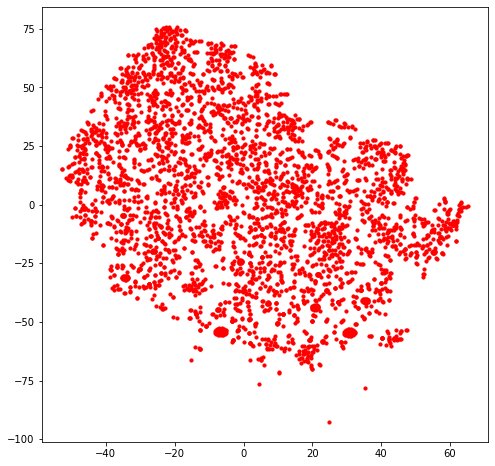

In [71]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:,0], tsne_data[:,1],s=10,c='r')
plt.show()

In [72]:
# K-means 실행
from sklearn.cluster import KMeans
# Hierarchical Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
# DBSCAN
from sklearn.cluster import DBSCAN
# Spectral Clustering
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_score

In [73]:
model = KMeans(n_clusters=4)
pred = model.fit_predict(X)
model2 = KMeans(n_clusters=2)
pred2 = model2.fit_predict(X)

print('Silhousette Score1 : %.4f' % silhouette_score(X,pred))
print('Silhousette Score2 : %.4f' % silhouette_score(X,pred2))

Silhousette Score1 : 0.1999
Silhousette Score2 : 0.3583


In [74]:
# elbow method
sse = []
silhouettes = []
for K in range(2,11):
    model = KMeans(n_clusters=K).fit(X) # K : 2 ~ 10
    pred = model.fit_predict(X)
    sse.append(model.inertia_)
    silhouettes.append(silhouette_score(X,pred))

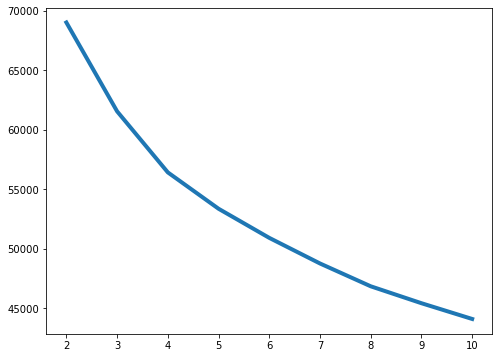

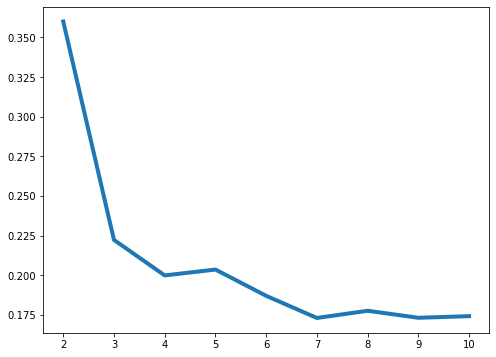

In [75]:
# Best K?
plt.figure(figsize=(8,6))
plt.plot(range(2,11),sse,lw=4)
plt.show()
plt.figure(figsize=(8,6))
plt.plot(range(2,11),silhouettes,lw=4)
plt.show()

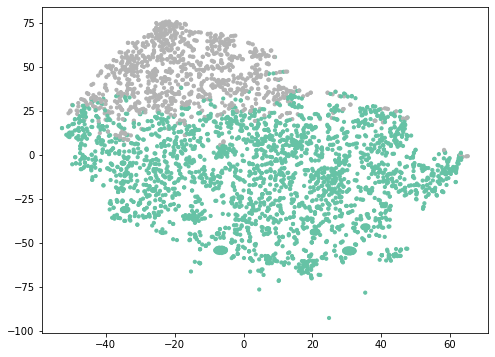

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],s=10,c=pred2,cmap='Set2')
plt.show()

In [77]:
# see summary
X['cluster_label'] = pred
X['Cluster_label'] = pred2

In [89]:
group1 = X.loc[X.cluster_label == 0, :]
group2 = X.loc[X.cluster_label == 1, :]
group3 = X.loc[X.Cluster_label == 0, :]
group4 = X.loc[X.Cluster_label == 1, :]
print(group1.shape, group2.shape, group3.shape, group4.shape)

(194, 23) (709, 23) (2871, 23) (1027, 23)


In [90]:
group1.mean() # top3 : dairy egg, produce, snacks

department
alcohol            0.030928
babies             0.309278
bakery             0.391753
beverages          0.881443
breakfast          0.262887
bulk               0.005155
canned goods       0.427835
dairy eggs         1.360825
deli               0.386598
dry goods pasta    0.242268
frozen             3.623711
household          0.314433
international      0.067010
meat seafood       0.237113
missing            0.067010
other              0.010309
pantry             0.701031
personal care      0.293814
pets               0.046392
produce            1.597938
snacks             0.963918
cluster_label      0.000000
Cluster_label      0.077320
dtype: float64

In [91]:
group2.mean() # top3 : produce, daily eggs , snacks

department
alcohol            0.012694
babies             0.090268
bakery             0.331453
beverages          0.444288
breakfast          0.118477
bulk               0.023977
canned goods       0.304654
dairy eggs         1.126939
deli               0.286319
dry goods pasta    0.225670
frozen             0.392102
household          0.184767
international      0.066291
meat seafood       0.224260
missing            0.009873
other              0.004231
pantry             0.513399
personal care      0.086037
pets               0.029619
produce            3.992948
snacks             0.496474
cluster_label      1.000000
Cluster_label      0.265162
dtype: float64

In [92]:
group3.mean()

department
alcohol            0.052595
babies             0.110763
bakery             0.312086
beverages          0.787182
breakfast          0.195054
bulk               0.008708
canned goods       0.238941
dairy eggs         1.254267
deli               0.242424
dry goods pasta    0.183560
frozen             0.576106
household          0.231975
international      0.058865
meat seafood       0.159526
missing            0.012887
other              0.012191
pantry             0.461163
personal care      0.138279
pets               0.030303
produce            1.462905
snacks             0.765587
cluster_label      3.441310
Cluster_label      0.000000
dtype: float64

In [93]:
group4.mean()

department
alcohol            0.024343
babies             0.252191
bakery             0.593963
beverages          1.055501
breakfast          0.324245
bulk               0.027264
canned goods       0.649464
dairy eggs         3.011685
deli               0.588121
dry goods pasta    0.464460
frozen             1.046738
household          0.238559
international      0.146056
meat seafood       0.415774
missing            0.028238
other              0.006816
pantry             0.976631
personal care      0.145083
pets               0.030185
produce            7.240506
snacks             1.288218
cluster_label      4.751704
Cluster_label      1.000000
dtype: float64